In [1]:
%matplotlib inline
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import os

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

D:\Courses\machine_learning\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

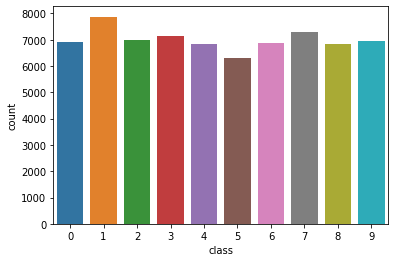

In [8]:
import seaborn as sns

sns.countplot(y,label='count',)

## Exercise

### 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. 
**Hint: the KNeighborsClassifier works quite well for this task;**
* Find good hyperparameter values (try a **grid search** on the weights and n_neighbors hyperparameters).

##### Rough training using KNeighborsClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

<AxesSubplot:>

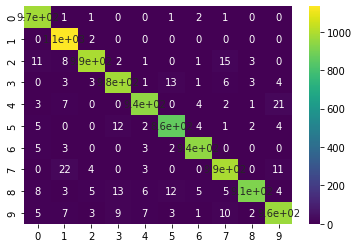

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [11]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### Model Hyper Parameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [4, 5, 6]},
    {'weights':['uniform','distance']},
    ]

clf = KNeighborsClassifier()

grid = GridSearchCV(clf, parameters, cv=7, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))



{'weights': 'distance'}
Accuracy:0.9706499576806495


In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
y_pred = knn_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

In [20]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "KNeighbor"       : knn_clf, 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    }

In [ ]:
# Start timing the models above
from time import time
nfast = 14      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

KNeighbor      | score = 0.971 | time = 0.096s/27.009s


### 2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.

- Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set.
- Finally, train your best model on this expanded training set and measure its accuracy on the test set.
- You should observe that your model performs even better now! 

This technique of artificially growing the training set is called _**data augmentation**_ or training set expansion

#### Data augmentation

In [7]:
X.shape, X_train.shape, X_test.shape

((70000, 784), (60000, 784), (10000, 784))

In [52]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [31]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

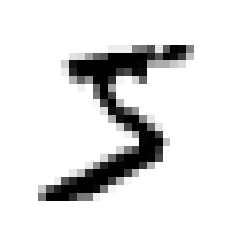

In [50]:
# Normal
some_digit=np.array(X_train.iloc[0])
normal = some_digit.reshape(28, 28)

plt.imshow(normal, cmap="binary")
plt.axis("off")
plt.show()

# Shift down
image = np.array(X_train.iloc[0])
shifted_image_down = shift_image(image, 0, 5)
down = shifted_image_down.reshape(28, 28)

#Shift left
image = np.array(X_train.iloc[0])
shifted_image_down = shift_image(image, -10, 0)
left = shifted_image_down.reshape(28, 28)

Saving figure Data Augmentation


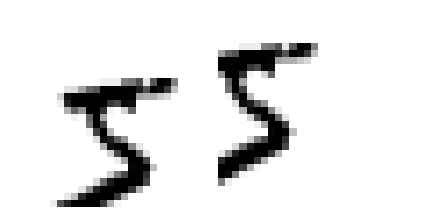

In [51]:
plt.subplot(121); plot_digit(down)
plt.subplot(122); plot_digit(left)
save_fig("Data Augmentation")
plt.show()

In [70]:
image = np.array(X_train.iloc[1000])

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.values, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

C:\Users\Edd.ie\AppData\Local\Temp\ipykernel_12408\4257767744.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_augmented = np.array(X_train_augmented)


In [73]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train_augmented, y_train_augmented)

In [74]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ERROR! Session/line number was not unique in database. History logging moved to new session 66
